In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3><b>Main task of this Analysis is to find that:</b></h3>
<h4>Is there any relationship between the deaths due to corona virus in a country and how happy people living in that country?</h4>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

<h1>About the datasets:</h1>



In this, we are going to use two datasets: Covid-19 dataset and World Happiness Dataset.


the first dataset which we are going to use is Covid-19 dataset is created by Johns Hopkins University. It consists of two datasets:

1.   covid19_Confirmed_dataset.csv 
2.   covid19_deaths_dataset.csv


second dataset is World happiness dataset is annual poplulation of United Nations having one dataset. 

1.   worldwide_happiness_report.csv


This dataset consists of scores given by people on various life factors like their lifestyle, social support,etc.



In [ ]:
# Import Covid-19 Dataset

covid_death = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Covid-19 Data Analysis/Covid-19 Dataset/covid19_deaths_dataset.csv')
covid_death.head(30)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,147,152,165,176,185,192,197,207,214,218
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,24,24,24,27,28,28,29,30,30,32
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,26,26,31,33,33,34,34,39,40,41


In [ ]:
# shape of the dataframe

covid_death.shape

(266, 104)

In [ ]:
# drop usless columns->Lat, Long

df = covid_death.drop(['Lat','Long'], axis=1, inplace=True)

In [ ]:
covid_death.head() #inplace=True deletes given column in this dataset also

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [ ]:
# aggregating the rows by the country

covid_aggregated_dataset = covid_death.groupby('Country/Region').sum() 
covid_aggregated_dataset.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [ ]:
# shape of covid_aggregated_dataset

covid_aggregated_dataset.shape

(187, 100)

Let's visualize the data related to a country for better understanding.

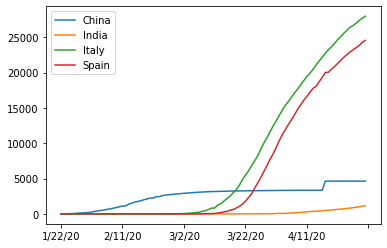

In [ ]:
# China
covid_aggregated_dataset.loc['China'].plot()

# India
covid_aggregated_dataset.loc['India'].plot()

# Italy
covid_aggregated_dataset.loc['Italy'].plot()

# Spain
covid_aggregated_dataset.loc['Spain'].plot()

plt.legend()
plt.show()

<h4>Let's calculate the good measure of the country.</h4>

Good measure represents a number describing the death due to spread of the virus in a country




This covid-19 dataset consists of no. of cases from 22/01/2020 to 30/04/2020.

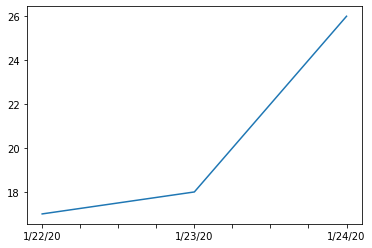

In [ ]:
# So let's find the good measure of China of first three days

covid_aggregated_dataset.loc['China'][:3].plot()



*  According to this plot, in 22/01/2020, around 10 deaths were recorded and in 23/01/2020, around 18 deaths were recorded that means in 24 hours, 8 new deathss were recorded and after 24 hours, i.e. in 24th Jan.,2020, around 26 deaths were recorded..that means virus was spreading very fast in china.




Spread of the virus is the average number of new death cases or we can say it's a maximum number of new deaths.

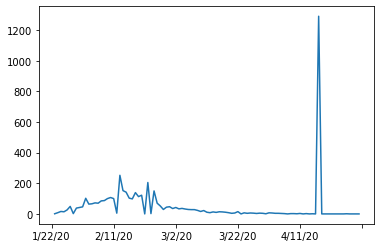

In [ ]:
# calculate maximum number of deaths in a period i.e. first derivative

covid_aggregated_dataset.loc['China'].diff().plot()



*   This plot shows the change in death rate day by day in a period. And the maximum number of deaths is above 12000 till 30/04/2020.




In [ ]:
# maximum death rate for China
covid_aggregated_dataset.loc['China'].diff().max()

1290.0

*   In one day, 1290 new deaths has been recorded which is the highest number of deaths recorded in China in only 24 hours.

In [ ]:
# maximum death rate for India
covid_aggregated_dataset.loc['India'].diff().max()

75.0

*   In one day, 75 new deaths has been recorded which is the highest number of deaths recorded in India in only 24 hours.

In [ ]:
# maximum death rate for Italy
covid_aggregated_dataset.loc['Italy'].diff().max()

919.0

*   In one day, 919 new deaths has been recorded which is the highest number of deaths recorded in India in only 24 hours.

In [ ]:
# maximum death rate for Spain
covid_aggregated_dataset.loc['Spain'].diff().max()

961.0

*   In one day, 961 new deaths has been recorded which is the highest number of deaths recorded in India in only 24 hours.

In [ ]:
# maximum death rate for all the countries
countries = list(covid_aggregated_dataset.index)

max_death_rate = []

for c in countries:
  max_death_rate.append(covid_aggregated_dataset.loc[c].diff().max())

In [ ]:
max_death_rate

[7.0,
 4.0,
 30.0,
 4.0,
 2.0,
 1.0,
 13.0,
 3.0,
 8.0,
 30.0,
 3.0,
 3.0,
 1.0,
 15.0,
 1.0,
 5.0,
 496.0,
 1.0,
 1.0,
 0.0,
 6.0,
 6.0,
 1.0,
 493.0,
 1.0,
 6.0,
 4.0,
 2.0,
 1.0,
 1.0,
 0.0,
 20.0,
 251.0,
 0.0,
 3.0,
 13.0,
 1290.0,
 26.0,
 0.0,
 3.0,
 5.0,
 1.0,
 4.0,
 8.0,
 6.0,
 2.0,
 18.0,
 22.0,
 2.0,
 1.0,
 0.0,
 38.0,
 208.0,
 22.0,
 1.0,
 1.0,
 0.0,
 6.0,
 1.0,
 2.0,
 0.0,
 43.0,
 1440.0,
 1.0,
 1.0,
 1.0,
 510.0,
 5.0,
 10.0,
 0.0,
 3.0,
 2.0,
 1.0,
 2.0,
 2.0,
 0.0,
 8.0,
 23.0,
 5.0,
 75.0,
 60.0,
 158.0,
 7.0,
 220.0,
 13.0,
 919.0,
 2.0,
 47.0,
 2.0,
 5.0,
 2.0,
 11.0,
 10.0,
 4.0,
 3.0,
 0.0,
 4.0,
 2.0,
 4.0,
 1.0,
 1.0,
 6.0,
 8.0,
 2.0,
 0.0,
 1.0,
 8.0,
 1.0,
 4.0,
 1.0,
 1.0,
 2.0,
 163.0,
 10.0,
 2.0,
 0.0,
 1.0,
 12.0,
 0.0,
 0.0,
 0.0,
 234.0,
 4.0,
 1.0,
 4.0,
 7.0,
 6.0,
 16.0,
 2.0,
 42.0,
 11.0,
 0.0,
 2.0,
 108.0,
 50.0,
 40.0,
 37.0,
 2.0,
 34.0,
 105.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 9.0,
 2.0,
 54.0,
 0.0,
 3.0,
 2.0,
 4.0,
 6.0,
 8.0,
 14.0,
 0.

In [ ]:
# add max_death_rate to covid_aggregated_dataset
covid_aggregated_dataset['max_death_rate'] = max_death_rate

In [ ]:
covid_aggregated_dataset.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


In [ ]:
# create a new dataframe with only needed column
covid_data = pd.DataFrame(covid_aggregated_dataset["max_death_rate"])

In [ ]:
covid_data.head()

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [ ]:
covid_data.shape

(187, 1)

In [ ]:
# Import World Happiness report dataset

world_happiness = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Covid-19 Data Analysis/Worldwide Happiness Report/worldwide_happiness_report.csv')
world_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
# drop useless columns

world_happiness.drop(['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption'], axis=1, inplace=True)
world_happiness.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [ ]:
# change the indices of the dataframe to Country or region
world_happiness.set_index("Country or region", inplace=True)

In [ ]:
world_happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Let's join two datasets we've prepared

In [ ]:
''' shape of covid_aggregated_dataset: (187,1)
    shape of world_happiness: (156,4)
    shape of covid_aggregated_dataset is much higher than the shape of world happiness
    so, that's why we use inner join'''
dataframe = covid_data.join(world_happiness,how='inner')

In [ ]:
dataframe.head()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


In [ ]:
# to find is there any correlation between different life factors and column represent the spread of the virus in each of the country
# correlation matrix: having correlation coefficients of every two column in a dataset

dataframe.corr()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


<h2>Visualize the result</h2>


In [ ]:
dataframe.head()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

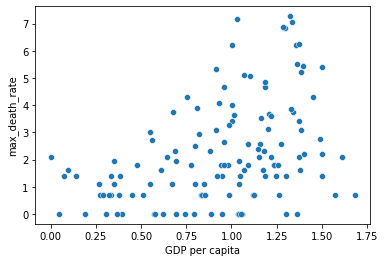

In [ ]:
# plotting GDP vs max_death_rate
x = dataframe['GDP per capita']
y = dataframe['max_death_rate']
sb.scatterplot(x,np.log(y))
plt.plot()

due to different scaling, it's very difficult to visualize the plot so we use log in y axis, i.e. in GDP per capita.



*   As GDP per captia grows, max_infection_rate also growing.



/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


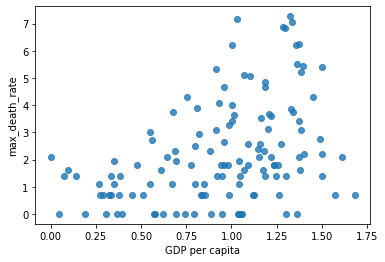

In [ ]:
sb.regplot(x,np.log(y)) # for better visualization



*   There's a positive slope between GDP per capita and max_death_rate



/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

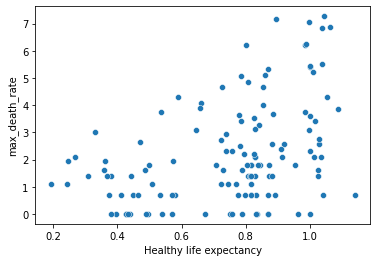

In [ ]:
# plotting Healthy life expectancy vs max_death_rate
x = dataframe['Healthy life expectancy']
y = dataframe['max_death_rate']
sb.scatterplot(x,np.log(y))
plt.plot()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


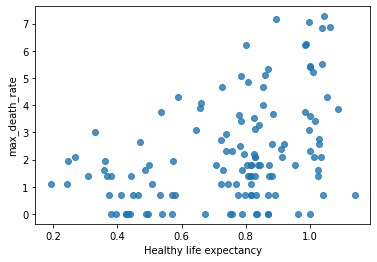

In [ ]:
sb.regplot(x,np.log(y)) # for better visualization

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

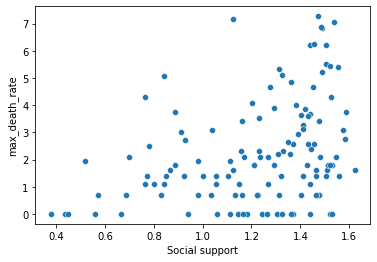

In [ ]:
# plotting Social support vs max_infection_rate
x = dataframe['Social support']
y = dataframe['max_death_rate']
sb.scatterplot(x,np.log(y))
plt.plot()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


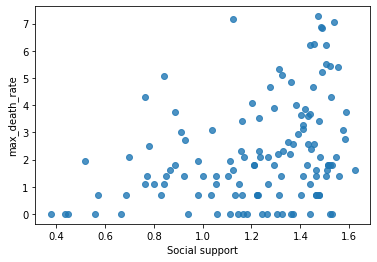

In [ ]:
sb.regplot(x,np.log(y)) # for better visualization

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

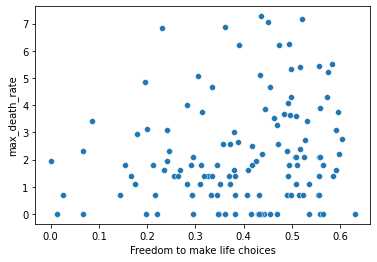

In [ ]:
# plotting Freedom to make life choices vs max_infection_rate
x = dataframe['Freedom to make life choices']
y = dataframe['max_death_rate']
sb.scatterplot(x,np.log(y))
plt.plot()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


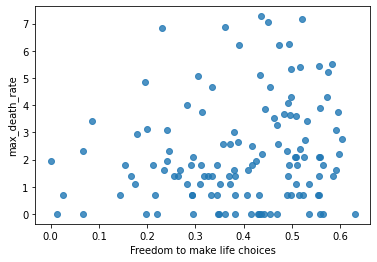

In [ ]:
sb.regplot(x,np.log(y)) # for better visualization



*   If we visualize all the plots, then we see that all the plot have positive correlation.




## Conclusion

*   People living in developed countries are more prone to get infection of corona virus as compared to less-developed countries. And also more deaths are recorded because of high population and lack of awareness and social distancing.
*   Maybe because of lack of corona test kits in less-developed countries.


